In [31]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [32]:
titanic_train = pd.read_csv("train_clean.csv")
titanic_train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [33]:
titanic_test = pd.read_csv("test_clean.csv")
titanic_test.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr,0
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs,1
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr,0
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr,0
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Mrs,2


In [34]:
titanic_train.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.445196,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838,0.904602
std,13.244896,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000,0.000000
75%,35.500000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000,10.000000


In [35]:
titanic_train.shape

(891, 14)

In [36]:
titanic_train["Survived"].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

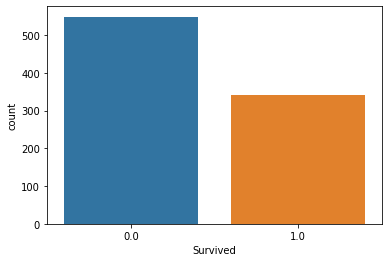

In [37]:
sns.countplot(titanic_train["Survived"])

Text(0.5, 0, 'Age')

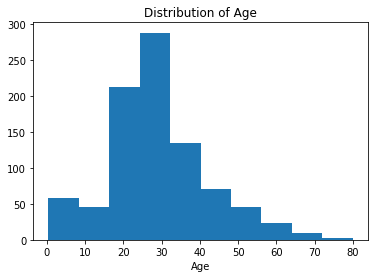

In [38]:
plt.hist(titanic_train["Age"])
plt.title("Distribution of Age")
plt.xlabel("Age")


In [39]:
titanic_train.groupby('Sex')[["Survived"]].mean()


,Survived
Sex,
female,0.742038
male,0.188908


In [40]:
titanic_train.pivot_table('Survived',index='Sex',columns='Pclass')


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [41]:
titanic_train.isnull().sum()

Age              0
Cabin          687
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
Title            0
Family_Size      0
dtype: int64

In [42]:
titanic_test.isnull().sum()

Age              0
Cabin          327
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Title            0
Family_Size      0
dtype: int64

In [43]:
titanic_train = titanic_train.drop('Cabin',axis=1)
titanic_test = titanic_test.drop('Cabin',axis=1)



In [44]:
titanic_train.isnull().sum()


Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Title          0
Family_Size    0
dtype: int64

In [45]:
titanic_test = titanic_test.fillna(0)


In [46]:
titanic_test.isnull().sum()


Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Title          0
Family_Size    0
dtype: int64

<AxesSubplot:xlabel='Sex'>

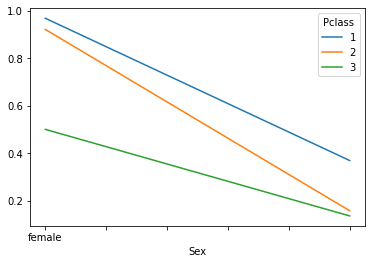

In [47]:
titanic_train.pivot_table('Survived',index='Sex',columns='Pclass').plot()

In [48]:
x_train = pd.get_dummies(titanic_train[["Pclass", "Sex", "SibSp", "Parch"]])
y_train=titanic_train["Survived"]
x_test = pd.get_dummies(titanic_test[["Pclass", "Sex", "SibSp", "Parch"]])
y_test=titanic_test["Survived"]

# **RANDOM FOREST**

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
model = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_predict)

In [50]:
from prettytable import PrettyTable
acc_table= PrettyTable(["Algorithom", " Accuracy"])
acc_table.add_row(["Random Forest",acc*100])


# **DESCISION TREE**

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
model =clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
acc=metrics.accuracy_score(y_test,y_predict)
acc_table.add_row(["DecisionTree",acc*100])


# **KNN**

In [52]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=8)
model=clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
acc=metrics.accuracy_score(y_test,y_predict)
acc_table.add_row(["KNeigbhors",acc*100])


# **NAIVE BAYES**

In [53]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
model=clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
acc=metrics.accuracy_score(y_test,y_predict)
acc_table.add_row(["MultinomialNB",acc*100])


# **SVM**

In [54]:
from sklearn import svm
clf=svm.SVC()
model=clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
acc=metrics.accuracy_score(y_test,y_predict)
acc_table.add_row(["SVM",acc*100])


# **SUMMERY**

In [55]:
print(acc_table)


+---------------+-------------------+
|   Algorithom  |      Accuracy     |
+---------------+-------------------+
| Random Forest | 67.70334928229666 |
|  DecisionTree | 68.89952153110048 |
|   KNeigbhors  | 67.46411483253588 |
| MultinomialNB | 62.91866028708134 |
|      SVM      | 64.83253588516746 |
+---------------+-------------------+
